# velocity of dwarf 2, with RT

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

from NFW_Z import NFW_Z

%matplotlib inline

In [2]:
dm_260 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/RT/dwarf_dm_7e8_rt_0260.txt")

dx_dm_260 = dm_260[:,4] / 1000 # converting pc to kpc
dy_dm_260 = dm_260[:,5] / 1000 # converting pc to kpc
dz_dm_260 = dm_260[:,6] / 1000 # converting pc to kpc
r_dm_260 = np.sqrt(dx_dm_260**2 + dy_dm_260**2 + dz_dm_260**2)
print(max(r_dm_260))

vx_dm_260 = dm_260[:,7]
vy_dm_260 = dm_260[:,8]
vz_dm_260 = dm_260[:,9]
vx_dm_COM = np.sum(vx_dm_260) / np.size(vx_dm_260)
vy_dm_COM = np.sum(vy_dm_260) / np.size(vy_dm_260)
vz_dm_COM = np.sum(vz_dm_260) / np.size(vz_dm_260)
vx_dm_new = vx_dm_260 - vx_dm_COM
vy_dm_new = vy_dm_260 - vy_dm_COM
vz_dm_new = vz_dm_260 - vz_dm_COM
v_dm_new = np.sqrt(vx_dm_new**2 + vy_dm_new**2 + vz_dm_new**2)

8.158496796591882


In [3]:
star_260 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf2/RT/dwarf_star_7e8_rt_0260.txt")

dx_star_260 = star_260[:,4] / 1000 # converting pc to kpc
dy_star_260 = star_260[:,5] / 1000 # converting pc to kpc
dz_star_260 = star_260[:,6] / 1000 # converting pc to kpc
r_star_260 = np.sqrt(dx_star_260**2 + dy_star_260**2 + dz_star_260**2)

vx_star_260 = star_260[:,7]
vy_star_260 = star_260[:,8]
vz_star_260 = star_260[:,9]
vx_star_COM = np.sum(vx_star_260) / np.size(vx_star_260)
vy_star_COM = np.sum(vy_star_260) / np.size(vy_star_260)
vz_star_COM = np.sum(vz_star_260) / np.size(vz_star_260)
vx_star_new = vx_star_260 - vx_star_COM
vy_star_new = vy_star_260 - vy_star_COM
vz_star_new = vz_star_260 - vz_star_COM
v_star_new = np.sqrt(vx_star_new**2 + vy_star_new**2 + vz_star_new**2)

## CHAPTER 1:
## Speed of dark matter & star particles with respect to distance from dwarf center

In [4]:
'''Generate a radius array to work by later. unit: kpc'''

radius_array = np.arange(0.01, 8.16, 0.02)

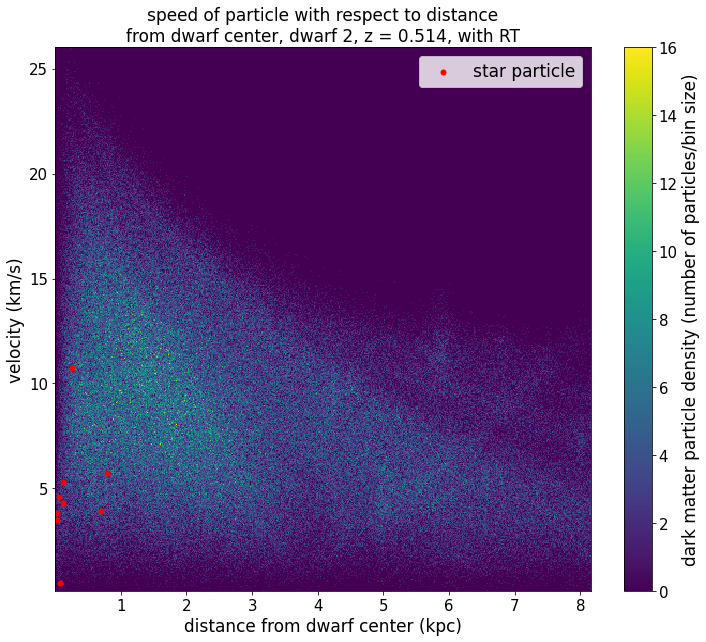

In [5]:
fig, ax = plt.subplots(figsize=[12, 10])

plt.hist2d(r_dm_260, v_dm_new, bins=500, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(label='dark matter particle density (number of particles/bin size)', size=17)
cbar.ax.tick_params(labelsize=15)

plt.scatter(r_star_260, v_star_new, 25, color='red', label='star particle')
#plt.plot(radius_array, v_esc_Jeon, linewidth=4, color='darkviolet', label="NFW fit from Jeon's M$_{vir}$")
#plt.plot(radius_array, v_esc_1D, linewidth=4, color='hotpink', label='NFW fit 1D')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of particle with respect to distance\nfrom dwarf center, dwarf 2, z = 0.514, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=17)

plt.show()

## CHAPTER 2 
## Mean velocity and velocity dispersion profiles of dark matter particles

In [6]:
bin_size = 0.02

In [7]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

mean_vx = np.zeros(np.size(radius_array))
mean_vy = np.zeros(np.size(radius_array))
mean_vz = np.zeros(np.size(radius_array))

sigma_vx = np.zeros(np.size(radius_array))
sigma_vy = np.zeros(np.size(radius_array))
sigma_vz = np.zeros(np.size(radius_array))

h = 0

for radius_value in radius_array:
    location = np.where((r_dm_260 < (radius_value + bin_size)))
    vx_values = vx_dm_new[location]
    vy_values = vy_dm_new[location]
    vz_values = vz_dm_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_vx[h] = np.mean(vx_array)
    mean_vy[h] = np.mean(vy_array)
    mean_vz[h] = np.mean(vz_array)
    sigma_vx[h] = np.std(vx_array)
    sigma_vy[h] = np.std(vy_array)
    sigma_vz[h] = np.std(vz_array)
    h += 1

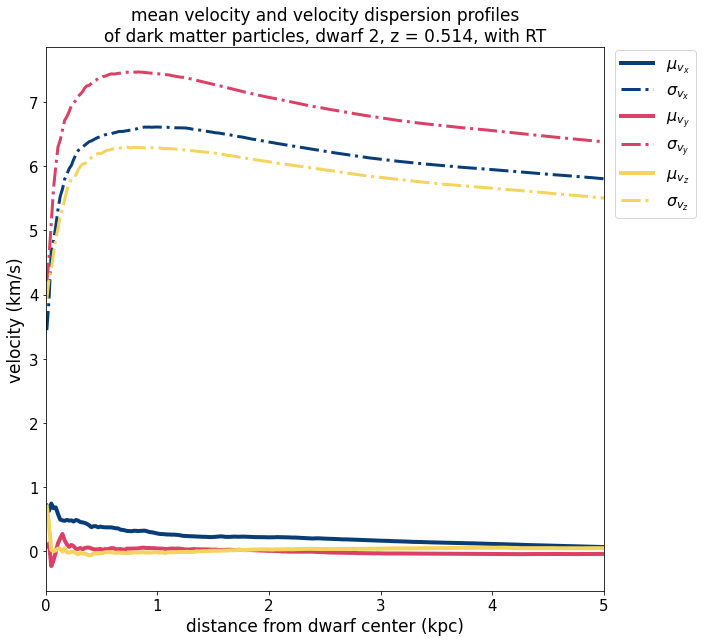

In [8]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0, 5)
plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 2, z = 0.514, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

## CHAPTER 3 
## Mean velocity and velocity dispersion profiles of star particles

In [9]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

bin_size = 0.02

mean_star_vx = np.zeros(np.size(radius_array))
mean_star_vy = np.zeros(np.size(radius_array))
mean_star_vz = np.zeros(np.size(radius_array))

sigma_star_vx = np.zeros(np.size(radius_array))
sigma_star_vy = np.zeros(np.size(radius_array))
sigma_star_vz = np.zeros(np.size(radius_array))

j = 0

for radius_value in radius_array:
    location = np.where((r_star_260 < (radius_value + bin_size)))
    vx_values = vx_star_new[location]
    vy_values = vy_star_new[location]
    vz_values = vz_star_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_star_vx[j] = np.mean(vx_array)
    mean_star_vy[j] = np.mean(vy_array)
    mean_star_vz[j] = np.mean(vz_array)
    sigma_star_vx[j] = np.std(vx_array)
    sigma_star_vy[j] = np.std(vy_array)
    sigma_star_vz[j] = np.std(vz_array)
    j += 1

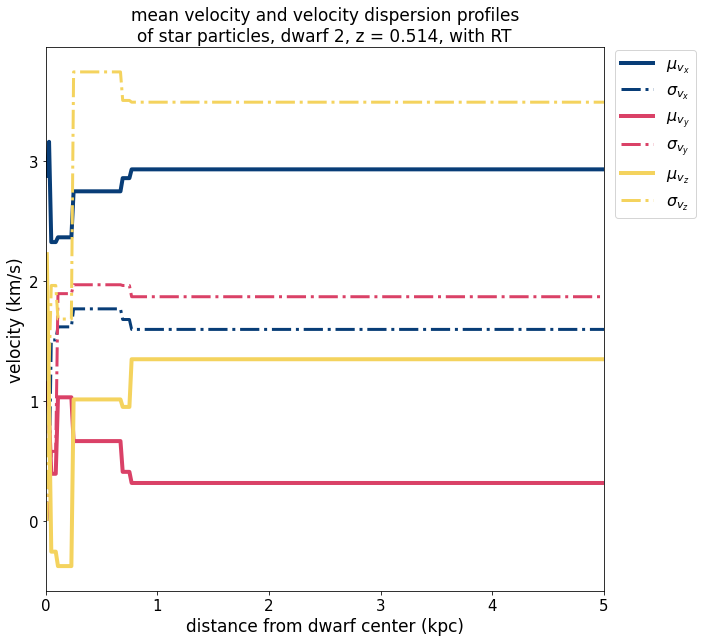

In [10]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_star_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_star_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_star_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_star_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_star_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_star_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0,5)
plt.title('mean velocity and velocity dispersion profiles\nof star particles, dwarf 2, z = 0.514, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

# CHAPTER 4 
## Mass profile of stars only. At which radius is the mass enclosed 1/2 of the total mass in stars?

In [11]:
'''Read in the star particle mass info.'''

star_mass_260 = star_260[:,11]

In [12]:
'''Generate the mass profile.'''

bin_size = 0.02

mass_prof_stars = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_star_260 < (radius_value + bin_size)))
    masses_in_here = np.sum(star_mass_260[particles])
    mass_prof_stars[h] = masses_in_here
    h += 1

In [13]:
'''Where is the mass enclosed closest to 1/2 of the total star particle mass?'''

M_tot = mass_prof_stars[np.size(mass_prof_stars) - 1]
M_half = (1/2) * M_tot

print(M_half)

closest = (np.abs(mass_prof_stars - M_half)).argmin()
r_half = radius_array[closest]

1101.7264999999998


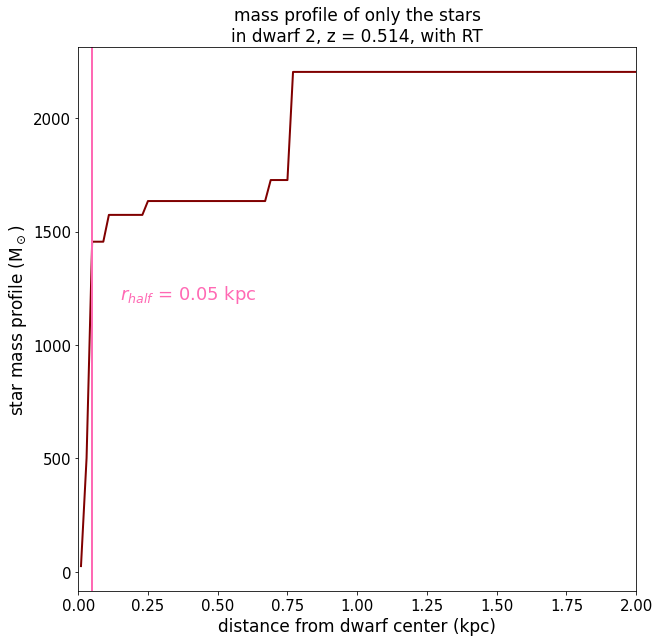

In [14]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mass_prof_stars, 'maroon', linewidth=2)

plt.axvline(r_half, color='hotpink', linewidth=2)

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('star mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xlim(0,2)
plt.title('mass profile of only the stars\nin dwarf 2, z = 0.514, with RT', loc='center', fontsize=17)
plt.text(r_half + 0.1, 1200, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

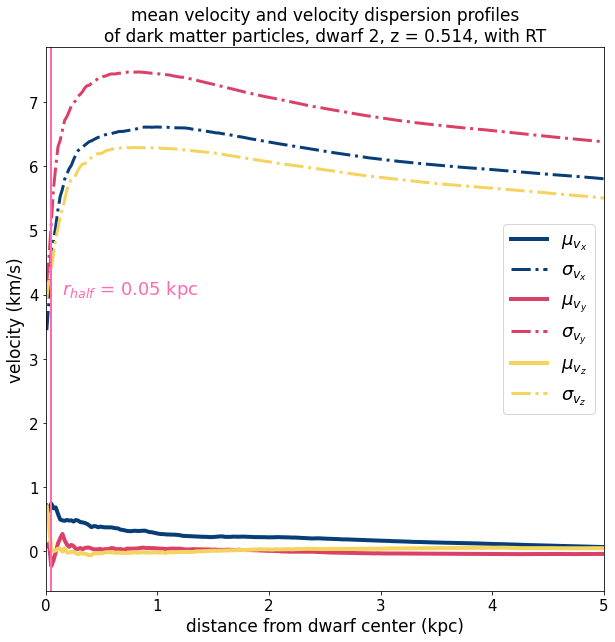

In [15]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(radius_array, sigma_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(radius_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(radius_array, sigma_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(radius_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(radius_array, sigma_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.axvline(r_half, color='hotpink', linewidth=2)
plt.text(r_half + 0.1, 4, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0, 5)
plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 2, z = 0.514, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='center right', fontsize=18, markerscale=2)

plt.show()

# CHAPTER 5
## As inferred from the velocity dispersion, find the mass enclosed within r<sub>half<sub>

In [16]:
'''Generate the mass profile from the dark matter particles.'''

mass_prof_dm = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_dm_260 < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_prof_dm[h] = how_many_particles * 500
    h += 1

In [17]:
'''Find the velocity dispersion of the star profiles within r_half.'''

sigma_star_vx_half = sigma_star_vx[closest]
sigma_star_vy_half = sigma_star_vy[closest]
sigma_star_vz_half = sigma_star_vz[closest]

In [18]:
G = 4.3009e-3 # pc*(km/s)^2 / Msun
M_real = mass_prof_dm[closest]

M_wolf = lambda sigma : 3 * (sigma)**2 * (r_half*1000) / G

M_half_x_wolf = M_wolf(sigma_star_vx_half)
M_half_y_wolf = M_wolf(sigma_star_vy_half)
M_half_z_wolf = M_wolf(sigma_star_vz_half)

M_ratio_x = M_half_x_wolf / M_real
M_ratio_y = M_half_y_wolf / M_real
M_ratio_z = M_half_z_wolf / M_real

print(mass_prof_dm[closest])
print(M_half_x_wolf)
print(M_half_y_wolf)
print(M_half_z_wolf)

print(round(M_ratio_x, 3), round(M_ratio_y, 3), round(M_ratio_z, 3))

357000.0
79233.88200725429
11695.22367411472
134120.70220767744
0.222 0.033 0.376


# CHAPTER 6
## Figuring out a M<sub>wolf</sub> function

In [20]:
def Wolf_mass(r, sigma):
    M_wolf = 3 * (sigma)**2 * (r*1000) / G
    return M_wolf

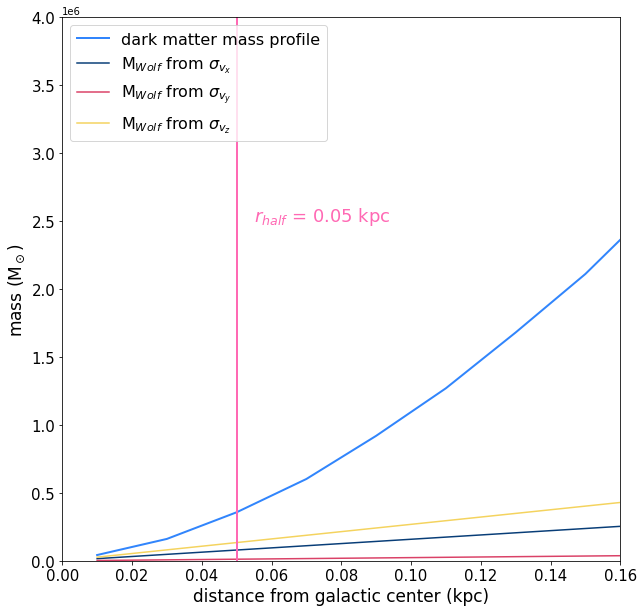

In [21]:
mass_profile = np.zeros(np.size(radius_array))
h = 0
for radius_value in radius_array:
    particles = np.where((r_dm_260 < (radius_value + 0.02)))
    how_many_particles = np.size(particles)
    mass_profile[h] = how_many_particles * 500
    h += 1

plt.figure(figsize=(10,10))

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('mass (M$_\odot$)', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(radius_array, mass_profile, color='#3185FC', linewidth=2, label="dark matter mass profile")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vx_half), color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vy_half), color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$")
plt.plot(radius_array, Wolf_mass(radius_array, sigma_star_vz_half), color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$")

plt.axvline(r_half, color='hotpink', linewidth=2)
plt.text(r_half + 0.005, 2.5*1e6, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

#plt.xlim(0, 11.3)
plt.xlim(0, 0.16)
plt.ylim(0, 0.4e7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', fontsize=16, markerscale=2)

#plt.xscale('log')
#plt.yscale('log')   

plt.show()